In [1]:
import pandas as pd
df = pd.read_csv('training_data.csv', encoding="unicode_escape")

In [2]:
X = df.drop('label', axis=1).values
y = df['label'].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
import joblib
joblib.dump(scaler,'scaler.save')

['scaler.save']

In [6]:
labels = sorted(list(set(y_train)))
labels

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'O']

In [7]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print(X_train.shape) # Debería mostrar (número de muestras de entrenamiento, número de sensores y valores de giroscopio)
print(y_train.shape) # Debería mostrar (número de muestras de entrenamiento, número de clases)

(18594, 18)
(18594, 13)


In [9]:
y

array(['A', 'A', 'A', ..., 'O', 'O', 'O'], dtype=object)

**MODELO**

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=18, activation='relu')) # Capa de entrada con N neuronas y función de activación ReLU
model.add(Dense(128, activation='relu')) # Capa oculta con 128 neuronas y función de activación ReLU
model.add(Dropout(0.5)) # Dropout para evitar el sobreajuste
model.add(Dense(13, activation='softmax')) # Capa de salida con 27 neuronas y función de activación softmax
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Función de pérdida, algoritmo de optimización y métricas de evaluación

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 13)                1677      
                                                                 
Total params: 11,213
Trainable params: 11,213
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test)) # Datos de entrenamiento, épocas, tamaño del lote y datos de validación

Epoch 1/50
582/582 [==============================] - 2s 2ms/step - loss: 0.9271 - accuracy: 0.6804 - val_loss: 0.2750 - val_accuracy: 0.8699
Epoch 2/50
582/582 [==============================] - 1s 1ms/step - loss: 0.2773 - accuracy: 0.8651 - val_loss: 0.2035 - val_accuracy: 0.8681
Epoch 3/50
582/582 [==============================] - 1s 1ms/step - loss: 0.2296 - accuracy: 0.8664 - val_loss: 0.1909 - val_accuracy: 0.8692
Epoch 4/50
582/582 [==============================] - 1s 2ms/step - loss: 0.2116 - accuracy: 0.8671 - val_loss: 0.1905 - val_accuracy: 0.8664
Epoch 5/50
582/582 [==============================] - 1s 2ms/step - loss: 0.2050 - accuracy: 0.8680 - val_loss: 0.1899 - val_accuracy: 0.8660
Epoch 6/50
582/582 [==============================] - 1s 1ms/step - loss: 0.2025 - accuracy: 0.8700 - val_loss: 0.1878 - val_accuracy: 0.8688
Epoch 7/50
582/582 [==============================] - 1s 2ms/step - loss: 0.1964 - accuracy: 0.8663 - val_loss: 0.1879 - val_accuracy: 0.8660
Epoch 

In [13]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test) # Datos de evaluación
print("Perdida: ", loss)
print("Precisión: ", accuracy)

146/146 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.8686
Perdida:  0.18186992406845093
Precisión:  0.8685739040374756


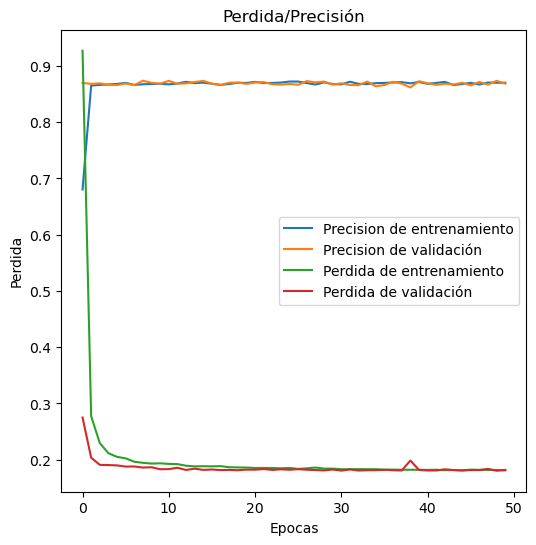

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='Precision de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precision de validación')
plt.plot(history.history['loss'], label='Perdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Perdida de validación')
plt.title('Perdida/Precisión')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()

In [15]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)
Y_pred

146/146 [==============================] - 0s 887us/step


array([2, 4, 0, ..., 1, 1, 0], dtype=int64)

In [16]:
Y_test = np.argmax(y_test, axis = 1)

In [17]:
Y_test

array([2, 3, 0, ..., 0, 1, 0], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score
print('La precision obtenidad en el set es de:', accuracy_score(Y_pred,Y_test))

La precision obtenidad en el set es de: 0.8685738868573887


In [19]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.34      0.50       577
           1       0.65      0.99      0.78       724
           2       1.00      1.00      1.00       408
           3       1.00      0.66      0.79       629
           4       0.73      0.99      0.84       578
           5       1.00      1.00      1.00       206
           6       1.00      1.00      1.00       192
           7       1.00      1.00      1.00       182
           8       1.00      1.00      1.00       211
           9       1.00      1.00      1.00       213
          10       1.00      1.00      1.00       323
          11       1.00      1.00      1.00       216
          12       1.00      1.00      1.00       190

    accuracy                           0.87      4649
   macro avg       0.95      0.92      0.92      4649
weighted avg       0.90      0.87      0.86      4649



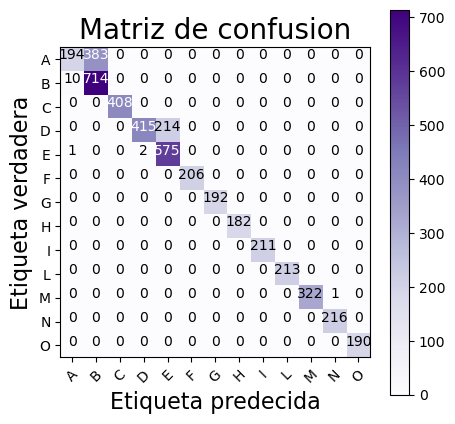

In [20]:
def plot_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (5, 5))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Matriz de confusion")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta predecida')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(X_test, batch_size = 32, verbose = 0)
plot_confusion_matrix(Y_test, Y_pred)

In [50]:
model.save("model.h5")